In [21]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [22]:
from tensorflow.keras.preprocessing.image import load_img

## Load an image

In [23]:
path = 'clothing-dataset-small/train/t-shirt'
name = '5f0a3fa0-6a3d-4b68-b213-72766a643de7.jpg'
fullname = f'{path}/{name}'

In [24]:
img = load_img(fullname, target_size=(299,299))

In [25]:
print(img)

<PIL.Image.Image image mode=RGB size=299x299 at 0x7FCDDCB1E520>


In [26]:
x = np.array(img)
x.shape

(299, 299, 3)

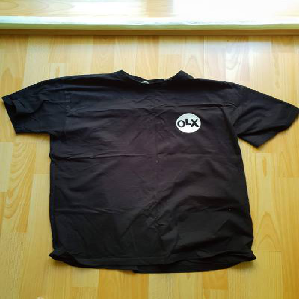

In [27]:
img

## Pre-trained convolutional neural networks
* Pre-trained models: https://keras.io/api/applications/

In [28]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions

In [29]:
model =Xception(weights="imagenet", input_shape=(299,299,3))


In [30]:
#This is how we create an array with multiple images X = np.array([x, y, z])
X = np.array([x])

In [31]:
X.shape

(1, 299, 299, 3)

In [32]:
X = preprocess_input(X)

In [33]:
pred = model.predict(X)

1/1 [==============================] - 1s 635ms/step


In [34]:
pred.shape

(1, 1000)

In [35]:
decode_predictions(pred)

[[('n03595614', 'jersey', 0.6792451),
  ('n02916936', 'bulletproof_vest', 0.03960026),
  ('n04370456', 'sweatshirt', 0.035299566),
  ('n03710637', 'maillot', 0.010884127),
  ('n04525038', 'velvet', 0.0018057587)]]

## Transfer learning

In [36]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [37]:
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)
train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/train', 
    target_size=(150,150), 
    batch_size=32
)

Found 3068 images belonging to 10 classes.


In [38]:
train_ds.class_indices

{'dress': 0,
 'hat': 1,
 'longsleeve': 2,
 'outwear': 3,
 'pants': 4,
 'shirt': 5,
 'shoes': 6,
 'shorts': 7,
 'skirt': 8,
 't-shirt': 9}

In [39]:
val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)
val_ds = val_gen.flow_from_directory(
    './clothing-dataset-small/validation/', 
    target_size=(150,150), 
    batch_size=32,
    shuffle= False
)

Found 341 images belonging to 10 classes.


In [40]:
base_model =Xception(weights='imagenet', 
                     include_top=False, 
                     input_shape=(150,150,3)
)

base_model.trainable = False

inputs = keras.Input(shape=(150,150,3))

base = base_model(inputs, training=False)

vectors = keras.layers.GlobalAveragePooling2D()(base)

outputs = keras.layers.Dense(10)(vectors)

model = keras.Model(inputs, outputs)

#### Training the model

In [41]:
learning_rate = 0.01
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

loss = keras.losses.CategoricalCrossentropy(from_logits=True)

model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [42]:
history = model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10
96/96 [==============================] - 19s 164ms/step - loss: 1.2496 - accuracy: 0.6714 - val_loss: 0.8984 - val_accuracy: 0.7507
Epoch 2/10
96/96 [==============================] - 12s 124ms/step - loss: 0.6214 - accuracy: 0.8149 - val_loss: 0.8724 - val_accuracy: 0.7947
Epoch 3/10
96/96 [==============================] - 12s 124ms/step - loss: 0.3620 - accuracy: 0.8758 - val_loss: 0.8183 - val_accuracy: 0.7830
Epoch 4/10
96/96 [==============================] - 12s 124ms/step - loss: 0.2315 - accuracy: 0.9198 - val_loss: 0.7839 - val_accuracy: 0.8182
Epoch 5/10
96/96 [==============================] - 12s 124ms/step - loss: 0.1627 - accuracy: 0.9384 - val_loss: 0.9097 - val_accuracy: 0.8123
Epoch 6/10
96/96 [==============================] - 12s 125ms/step - loss: 0.0885 - accuracy: 0.9684 - val_loss: 0.9647 - val_accuracy: 0.8094
Epoch 7/10
96/96 [==============================] - 12s 123ms/step - loss: 0.0734 - accuracy: 0.9769 - val_loss: 0.8284 - val_accuracy: 0.8094

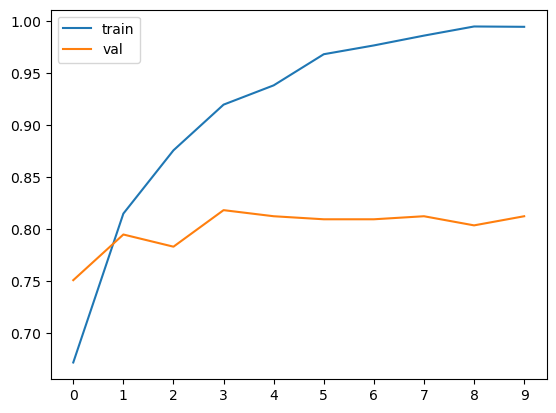

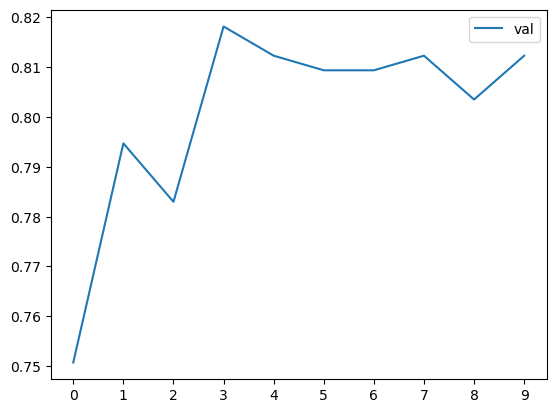

In [43]:
plt.plot(history.history["accuracy"], label='train')
plt.plot(history.history["val_accuracy"], label='val')
plt.xticks(np.arange(10))
plt.legend()
plt.show()

plt.plot(history.history["val_accuracy"], label='val')
plt.xticks(np.arange(10))
plt.legend()
plt.show()

## Adjusting the learning rate

In [44]:
def make_model(learning_rate=0.01):
    
    base_model =Xception(weights='imagenet', 
                     include_top=False, 
                     input_shape=(150,150,3)
    )

    base_model.trainable = False
    
    ##############################################
    
    inputs = keras.Input(shape=(150,150,3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    outputs = keras.layers.Dense(10)(vectors)
    model = keras.Model(inputs, outputs)
    
    ##############################################
    
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)
    
    model.compile(optimizer=optimizer, 
                  loss=loss, 
                  metrics=['accuracy']
    )
    
    return model

In [45]:
scores ={}

for lr in [0.0001, 0.001, 0.01, 0.1]:
    print(lr)
    
    model = make_model(learning_rate=lr)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[lr] = history.history
    
    print()
    print()

0.0001
Epoch 1/10
96/96 [==============================] - 15s 134ms/step - loss: 1.9158 - accuracy: 0.3325 - val_loss: 1.5549 - val_accuracy: 0.5103
Epoch 2/10
96/96 [==============================] - 12s 123ms/step - loss: 1.3541 - accuracy: 0.5782 - val_loss: 1.2093 - val_accuracy: 0.6657
Epoch 3/10
96/96 [==============================] - 12s 124ms/step - loss: 1.1140 - accuracy: 0.6535 - val_loss: 1.0347 - val_accuracy: 0.7067
Epoch 4/10
96/96 [==============================] - 12s 123ms/step - loss: 0.9803 - accuracy: 0.6923 - val_loss: 0.9303 - val_accuracy: 0.7419
Epoch 5/10
96/96 [==============================] - 12s 124ms/step - loss: 0.8918 - accuracy: 0.7148 - val_loss: 0.8578 - val_accuracy: 0.7683
Epoch 6/10
96/96 [==============================] - 12s 123ms/step - loss: 0.8273 - accuracy: 0.7363 - val_loss: 0.8085 - val_accuracy: 0.7771
Epoch 7/10
96/96 [==============================] - 12s 123ms/step - loss: 0.7760 - accuracy: 0.7520 - val_loss: 0.7706 - val_accuracy:

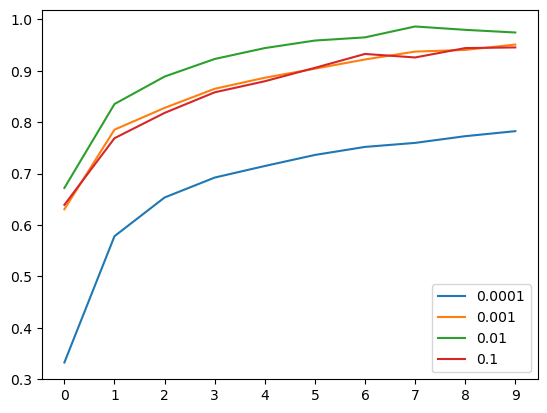

In [46]:
for lr, hist in scores.items():
    plt.plot(hist["accuracy"], label=lr)
    plt.xticks(np.arange(10))
    plt.legend()
plt.show()

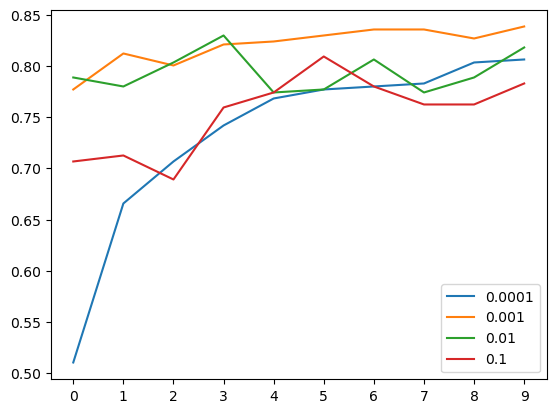

In [47]:
for lr, hist in scores.items():
    plt.plot(hist["val_accuracy"], label=lr)
    plt.xticks(np.arange(10))
    plt.legend()
plt.show()

In [48]:
del scores[0.1]
del scores[0.0001]

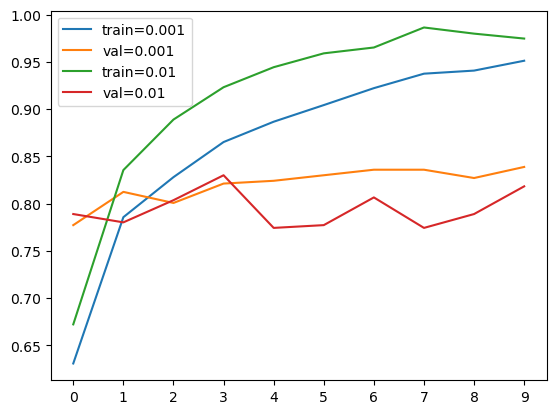

In [49]:
for lr, hist in scores.items():
    plt.plot(hist["accuracy"], label=f'train={lr}')
    plt.plot(hist["val_accuracy"], label=f'val={lr}')
    plt.xticks(np.arange(10))
    plt.legend()
plt.show()

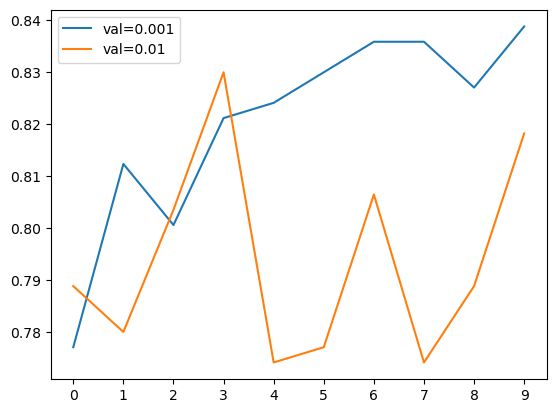

In [50]:
for lr, hist in scores.items():
    plt.plot(hist["val_accuracy"], label=f'val={lr}')
    plt.xticks(np.arange(10))
    plt.legend()
plt.show()

In [51]:
learning_rate = 0.001

## Checkpointing

In [52]:
checkpoint = keras.callbacks.ModelCheckpoint(
    'xception_v1_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [53]:
learning_rate = 0.001
model = make_model(learning_rate=learning_rate)
history = model.fit(
    train_ds,
    epochs=10,
    validation_data=val_ds,
    callbacks=[checkpoint]
)    

Epoch 1/10
96/96 [==============================] - 15s 134ms/step - loss: 1.0980 - accuracy: 0.6281 - val_loss: 0.7011 - val_accuracy: 0.7742
Epoch 2/10
96/96 [==============================] - 12s 129ms/step - loss: 0.6324 - accuracy: 0.7868 - val_loss: 0.6101 - val_accuracy: 0.7977
Epoch 3/10
96/96 [==============================] - 12s 127ms/step - loss: 0.5093 - accuracy: 0.8286 - val_loss: 0.5713 - val_accuracy: 0.8123
Epoch 4/10
96/96 [==============================] - 12s 123ms/step - loss: 0.4341 - accuracy: 0.8572 - val_loss: 0.5716 - val_accuracy: 0.8035
Epoch 5/10
96/96 [==============================] - 12s 123ms/step - loss: 0.3794 - accuracy: 0.8804 - val_loss: 0.5548 - val_accuracy: 0.8065
Epoch 6/10
96/96 [==============================] - 12s 122ms/step - loss: 0.3244 - accuracy: 0.9048 - val_loss: 0.5479 - val_accuracy: 0.8094
Epoch 7/10
96/96 [==============================] - 12s 127ms/step - loss: 0.2891 - accuracy: 0.9211 - val_loss: 0.5414 - val_accuracy: 0.8299

## Adding more layers
* Adding one innner dense layer
* Experumenting with different sizes of innner layer

In [54]:
def make_model(learning_rate=0.01, size_inner=100):
    
    base_model =Xception(weights='imagenet', 
                     include_top=False, 
                     input_shape=(150,150,3)
    )

    base_model.trainable = False
    
    ##############################################
    
    inputs = keras.Input(shape=(150,150,3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    
    outputs = keras.layers.Dense(10)(inner)
    
    model = keras.Model(inputs, outputs)
    
    ##############################################
    
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)
    
    model.compile(optimizer=optimizer, 
                  loss=loss, 
                  metrics=['accuracy']
    )
    
    return model

In [55]:
learning_rate = 0.001

scores ={}

for size in [10, 100, 1000]:
    print(size)
    
    model = make_model(learning_rate=learning_rate, size_inner=size)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[size] = history.history
    
    print()
    print()

10
Epoch 1/10
96/96 [==============================] - 15s 133ms/step - loss: 1.3941 - accuracy: 0.5538 - val_loss: 0.9139 - val_accuracy: 0.7361
Epoch 2/10
96/96 [==============================] - 12s 122ms/step - loss: 0.8434 - accuracy: 0.7285 - val_loss: 0.7548 - val_accuracy: 0.7713
Epoch 3/10
96/96 [==============================] - 12s 125ms/step - loss: 0.6444 - accuracy: 0.7891 - val_loss: 0.6218 - val_accuracy: 0.7977
Epoch 4/10
96/96 [==============================] - 12s 123ms/step - loss: 0.5063 - accuracy: 0.8403 - val_loss: 0.6320 - val_accuracy: 0.7801
Epoch 5/10
96/96 [==============================] - 12s 124ms/step - loss: 0.4203 - accuracy: 0.8729 - val_loss: 0.6037 - val_accuracy: 0.8006
Epoch 6/10
96/96 [==============================] - 12s 122ms/step - loss: 0.3590 - accuracy: 0.8895 - val_loss: 0.5562 - val_accuracy: 0.8094
Epoch 7/10
96/96 [==============================] - 12s 124ms/step - loss: 0.3177 - accuracy: 0.9081 - val_loss: 0.5549 - val_accuracy: 0.8

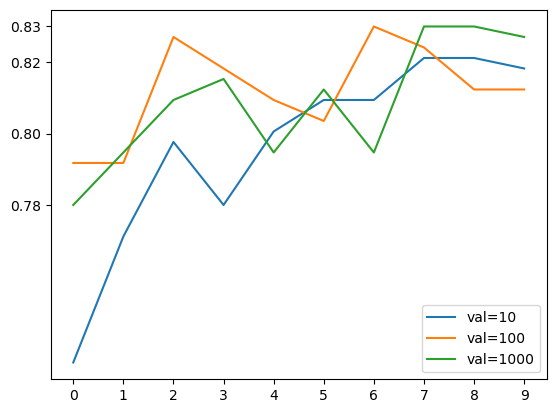

In [58]:
for size, hist in scores.items():
    plt.plot(hist["val_accuracy"], label=f'val={size}')
    plt.xticks(np.arange(10))
    plt.yticks([0.78, 0.80, 0.82, 0.83])
    plt.legend()
plt.show()

## Regularization and dropout
* Regularizing by freezing a part of the network
* Adding dropout to our model (Randomly hide a part of the input)
* Experimenting with different values

In [61]:
def make_model(learning_rate=0.01, size_inner=100, droprate=0.5):
    
    base_model =Xception(weights='imagenet', 
                     include_top=False, 
                     input_shape=(150,150,3)
    )

    base_model.trainable = False
    
    ##############################################
    
    inputs = keras.Input(shape=(150,150,3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner)
    
    outputs = keras.layers.Dense(10)(drop)
    
    model = keras.Model(inputs, outputs)
    
    ##############################################
    
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)
    
    model.compile(optimizer=optimizer, 
                  loss=loss, 
                  metrics=['accuracy']
    )
    
    return model

In [62]:
learning_rate = 0.001
size = 100

scores ={}

for droprate in [0.0, 0.2, 0.5, 0.8]:
    print(droprate)
    
    model = make_model(
        learning_rate=learning_rate,
        size_inner=size,
        droprate=droprate)
    history = model.fit(train_ds, epochs=30, validation_data=val_ds)
    scores[droprate] = history.history
    
    print()
    print()

0.0
Epoch 1/30
96/96 [==============================] - 15s 132ms/step - loss: 0.9818 - accuracy: 0.6643 - val_loss: 0.6175 - val_accuracy: 0.8152
Epoch 2/30
96/96 [==============================] - 12s 123ms/step - loss: 0.5152 - accuracy: 0.8217 - val_loss: 0.6507 - val_accuracy: 0.7947
Epoch 3/30
96/96 [==============================] - 12s 124ms/step - loss: 0.3681 - accuracy: 0.8778 - val_loss: 0.5595 - val_accuracy: 0.8094
Epoch 4/30
96/96 [==============================] - 12s 123ms/step - loss: 0.2427 - accuracy: 0.9263 - val_loss: 0.5418 - val_accuracy: 0.8328
Epoch 5/30
96/96 [==============================] - 12s 124ms/step - loss: 0.1751 - accuracy: 0.9550 - val_loss: 0.5696 - val_accuracy: 0.8299
Epoch 6/30
96/96 [==============================] - 12s 122ms/step - loss: 0.1157 - accuracy: 0.9785 - val_loss: 0.6028 - val_accuracy: 0.8328
Epoch 7/30
96/96 [==============================] - 12s 123ms/step - loss: 0.0816 - accuracy: 0.9889 - val_loss: 0.5854 - val_accuracy: 0.

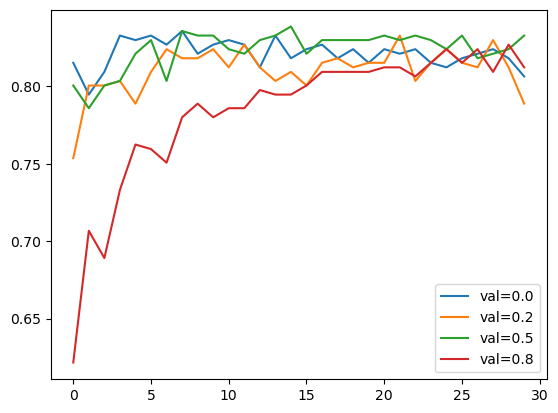

In [75]:
for droprate, hist in scores.items():
    plt.plot(hist["val_accuracy"], label=f'val={droprate}')
#plt.ylim(0.78, 0.84)
plt.legend()
plt.show()

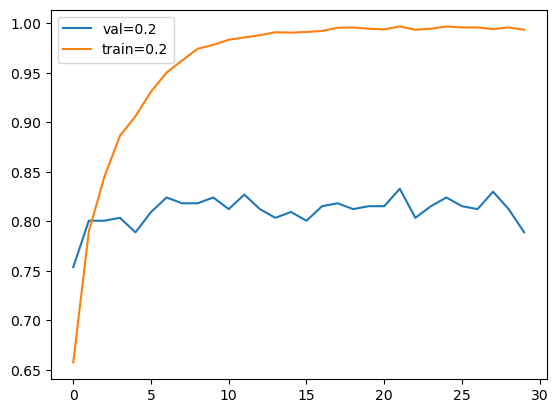

In [93]:
hist = scores[0.2]
plt.plot(hist["val_accuracy"],label=f'val={0.2}')
plt.plot(hist["accuracy"],label=f'train={0.2}')
plt.legend()
plt.show()

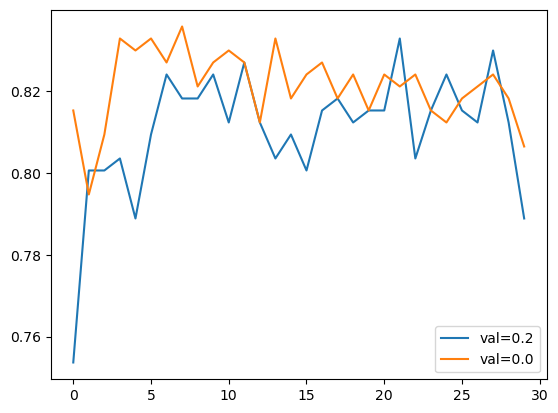

In [94]:
hist = scores[0.2]
plt.plot(hist["val_accuracy"],label=f'val={0.2}')

hist = scores[0.0]
plt.plot(hist["val_accuracy"],label=f'val={0.0}')

plt.legend()
plt.show()

## Data augmentation
### Possible image transformations: 
* Flip
* Rotation
* Shift
* Shear
* Zoom In/Out
* Brightness / Contrast
* Black Patch
* .... 
* We can combine the transformations 

In [95]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    shear_range=10.0,
    zoom_range=0.1,
    vertical_flip=True
)

train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/train', 
    target_size=(150,150), 
    batch_size=32
)

val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)
val_ds = val_gen.flow_from_directory(
    './clothing-dataset-small/validation/', 
    target_size=(150,150), 
    batch_size=32,
    shuffle= False
)

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


In [96]:
learning_rate = 0.001
size = 100
droprate = 0.2

model = make_model(
    learning_rate=learning_rate,
    size_inner=size,
    droprate=droprate)
history = model.fit(train_ds, epochs=50, validation_data=val_ds)


Epoch 1/50
96/96 [==============================] - 26s 252ms/step - loss: 1.2528 - accuracy: 0.5808 - val_loss: 0.7443 - val_accuracy: 0.7537
Epoch 2/50
96/96 [==============================] - 23s 244ms/step - loss: 0.9007 - accuracy: 0.6995 - val_loss: 0.6837 - val_accuracy: 0.7947
Epoch 3/50
96/96 [==============================] - 23s 243ms/step - loss: 0.7965 - accuracy: 0.7327 - val_loss: 0.6488 - val_accuracy: 0.7859
Epoch 4/50
96/96 [==============================] - 23s 244ms/step - loss: 0.6943 - accuracy: 0.7656 - val_loss: 0.6540 - val_accuracy: 0.7859
Epoch 5/50
96/96 [==============================] - 23s 241ms/step - loss: 0.6689 - accuracy: 0.7826 - val_loss: 0.6126 - val_accuracy: 0.7859
Epoch 6/50
96/96 [==============================] - 23s 244ms/step - loss: 0.5982 - accuracy: 0.7960 - val_loss: 0.5984 - val_accuracy: 0.8123
Epoch 7/50
96/96 [==============================] - 23s 244ms/step - loss: 0.5712 - accuracy: 0.8074 - val_loss: 0.6393 - val_accuracy: 0.8182

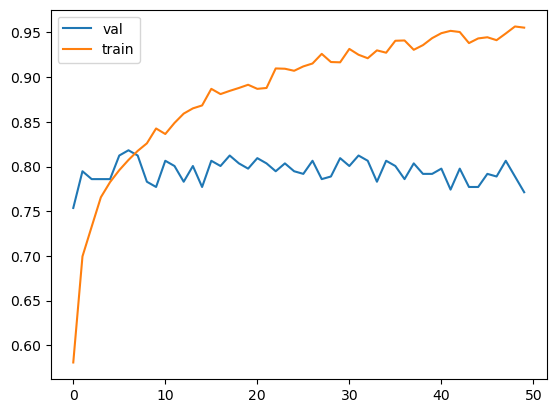

In [100]:
hist = history.history
plt.plot(hist["val_accuracy"],label='val')
plt.plot(hist["accuracy"],label='train')

plt.legend()
plt.show()

## Training a larger model
* Train a 299x299 model

In [107]:
input_size = 299

In [112]:
def make_model(input_size=150, learning_rate=0.01, size_inner=100, droprate=0.5):
    
    base_model =Xception(weights='imagenet', 
                     include_top=False, 
                     input_shape=(input_size,input_size,3)
    )

    base_model.trainable = False
    
    ##############################################
    
    inputs = keras.Input(shape=(input_size,input_size,3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner)
    
    outputs = keras.layers.Dense(10)(drop)
    
    model = keras.Model(inputs, outputs)
    
    ##############################################
    
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)
    
    model.compile(optimizer=optimizer, 
                  loss=loss, 
                  metrics=['accuracy']
    )
    
    return model

In [113]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    shear_range=10.0,
    zoom_range=0.1,
    vertical_flip=True
)

train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/train', 
    target_size=(input_size, input_size), 
    batch_size=32
)

val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)
val_ds = val_gen.flow_from_directory(
    './clothing-dataset-small/validation/', 
    target_size=(input_size, input_size), 
    batch_size=32,
    shuffle= False
)

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


In [114]:
checkpoint = keras.callbacks.ModelCheckpoint(
    'xception_v4_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [118]:
learning_rate = 0.001
size = 100
droprate = 0.2
input_size = 299
model = make_model(
    input_size=input_size,
    learning_rate=learning_rate,
    size_inner=size,
    droprate=droprate)
history = model.fit(train_ds, epochs=15, validation_data=val_ds,
                   callbacks=[checkpoint])


Epoch 1/15
96/96 [==============================] - 65s 657ms/step - loss: 1.1043 - accuracy: 0.6291 - val_loss: 0.5660 - val_accuracy: 0.8123
Epoch 2/15
96/96 [==============================] - 62s 641ms/step - loss: 0.6924 - accuracy: 0.7669 - val_loss: 0.5218 - val_accuracy: 0.8065
Epoch 3/15
96/96 [==============================] - 63s 653ms/step - loss: 0.5773 - accuracy: 0.8090 - val_loss: 0.4706 - val_accuracy: 0.8270
Epoch 4/15
96/96 [==============================] - 62s 649ms/step - loss: 0.5432 - accuracy: 0.8136 - val_loss: 0.4420 - val_accuracy: 0.8475
Epoch 5/15
96/96 [==============================] - 62s 639ms/step - loss: 0.4877 - accuracy: 0.8344 - val_loss: 0.4499 - val_accuracy: 0.8299
Epoch 6/15
96/96 [==============================] - 62s 648ms/step - loss: 0.4656 - accuracy: 0.8357 - val_loss: 0.4334 - val_accuracy: 0.8563
Epoch 7/15
96/96 [==============================] - 61s 638ms/step - loss: 0.4199 - accuracy: 0.8559 - val_loss: 0.4107 - val_accuracy: 0.8416

## Using the model

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img

from tensorflow.keras.applications.xception import preprocess_input

In [4]:
model = keras.models.load_model('xception_v4_15_0.871.h5')

In [8]:
test_gen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_ds = test_gen.flow_from_directory(
    './clothing-dataset-small/test/', 
    target_size=(299, 299), 
    batch_size=32,
    shuffle= False
)

Found 372 images belonging to 10 classes.


In [9]:
model.evaluate(test_ds)

12/12 [==============================] - 3s 282ms/step - loss: 0.2984 - accuracy: 0.8790


[0.29844579100608826, 0.8790322542190552]

In [10]:
path = './clothing-dataset-small/test/pants/c8d21106-bbdb-4e8d-83e4-bf3d14e54c16.jpg'

In [13]:
img = load_img(path, target_size=(299,299))

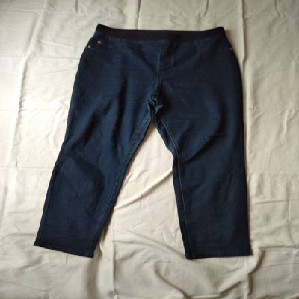

In [14]:
img

In [15]:
x = np.array(img)
X = np.array([x])
X.shape

(1, 299, 299, 3)

In [17]:
X = preprocess_input(X)

In [19]:
pred = model.predict(X)

1/1 [==============================] - 0s 23ms/step


In [20]:
classes = ['dress','hat','longsleeve','outwear','pants','shirt','shoes','shorts','skirt','t-shirt']

In [26]:
dict(zip(classes, pred[0]))

{'dress': -3.660549,
 'hat': -7.3929696,
 'longsleeve': -0.066179976,
 'outwear': -1.3208864,
 'pants': 9.880203,
 'shirt': -1.3994615,
 'shoes': -4.410341,
 'shorts': 4.1287966,
 'skirt': -3.745709,
 't-shirt': -5.4391866}